In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings(action = 'ignore')

# Load  cleaned data

In [23]:
df = pd.read_csv('../Data/Cleaned_data.csv')

In [24]:
df.head()

,Unnamed: 0,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [25]:
df.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [26]:
x = df.drop(columns = 'cardio', axis = 1)
y = df['cardio']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 25)

In [28]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(55980, 11)
(55980,)
(13996, 11)
(13996,)


In [29]:
corr = x_train.corr()
corr

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
age,1.000000,-0.023116,-0.083438,0.053910,0.018486,0.019380,0.154946,0.101239,-0.046982,-0.027656,-0.009541
gender,-0.023116,1.000000,0.498026,0.158008,0.006618,0.017041,-0.034928,-0.018792,0.337539,0.171749,0.006224
height,-0.083438,0.498026,1.000000,0.292236,0.005726,0.008436,-0.050786,-0.018613,0.187686,0.095570,-0.006981
weight,0.053910,0.158008,0.292236,1.000000,0.030530,0.045776,0.142190,0.104374,0.068936,0.068663,-0.016504
ap_hi,0.018486,0.006618,0.005726,0.030530,1.000000,0.017289,0.023632,0.009262,-0.000088,0.002602,0.000969
ap_lo,0.019380,0.017041,0.008436,0.045776,0.017289,1.000000,0.023702,0.009562,0.006025,0.013172,0.007298
cholesterol,0.154946,-0.034928,-0.050786,0.142190,0.023632,0.023702,1.000000,0.448087,0.012870,0.035074,0.013458
gluc,0.101239,-0.018792,-0.018613,0.104374,0.009262,0.009562,0.448087,1.000000,-0.003763,0.011865,-0.004281
smoke,-0.046982,0.337539,0.187686,0.068936,-0.000088,0.006025,0.012870,-0.003763,1.000000,0.340110,0.027506
alco,-0.027656,0.171749,0.095570,0.068663,0.002602,0.013172,0.035074,0.011865,0.340110,1.000000,0.022519


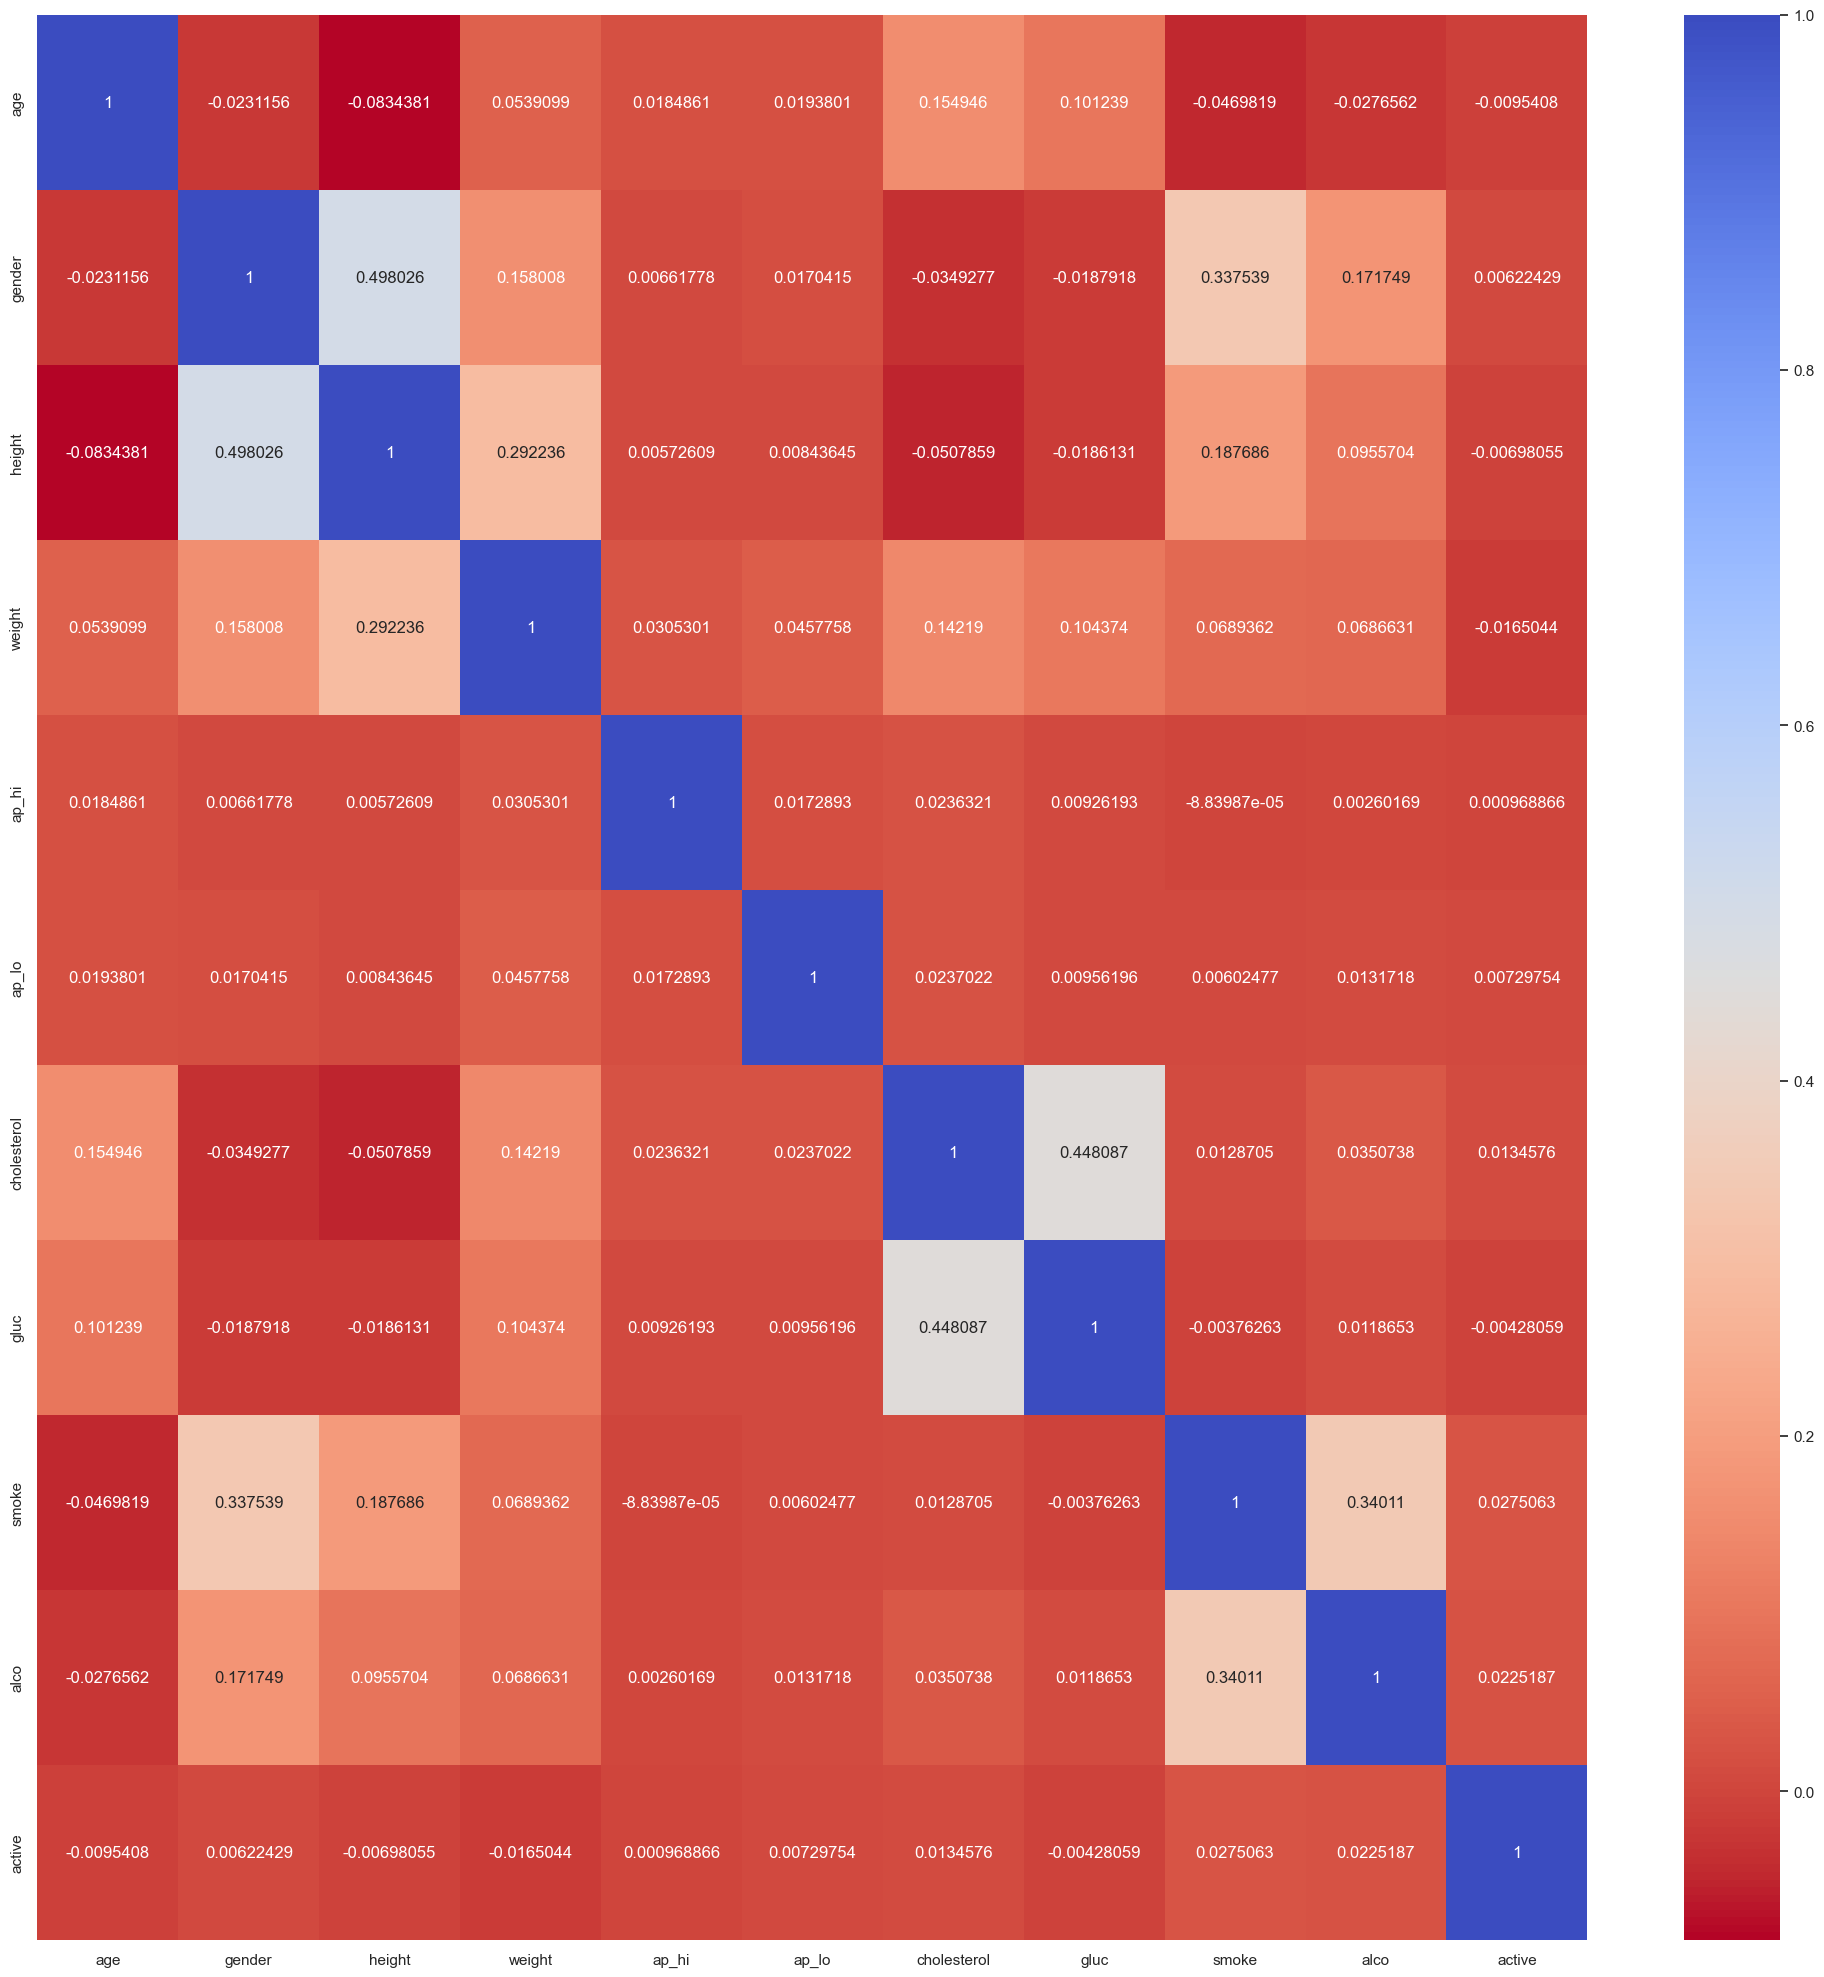

In [31]:
sns.set()
plt.figure(figsize = (25, 25))
sns.heatmap(corr, annot = True, cmap = "coolwarm_r" , fmt = 'g')
plt.show()

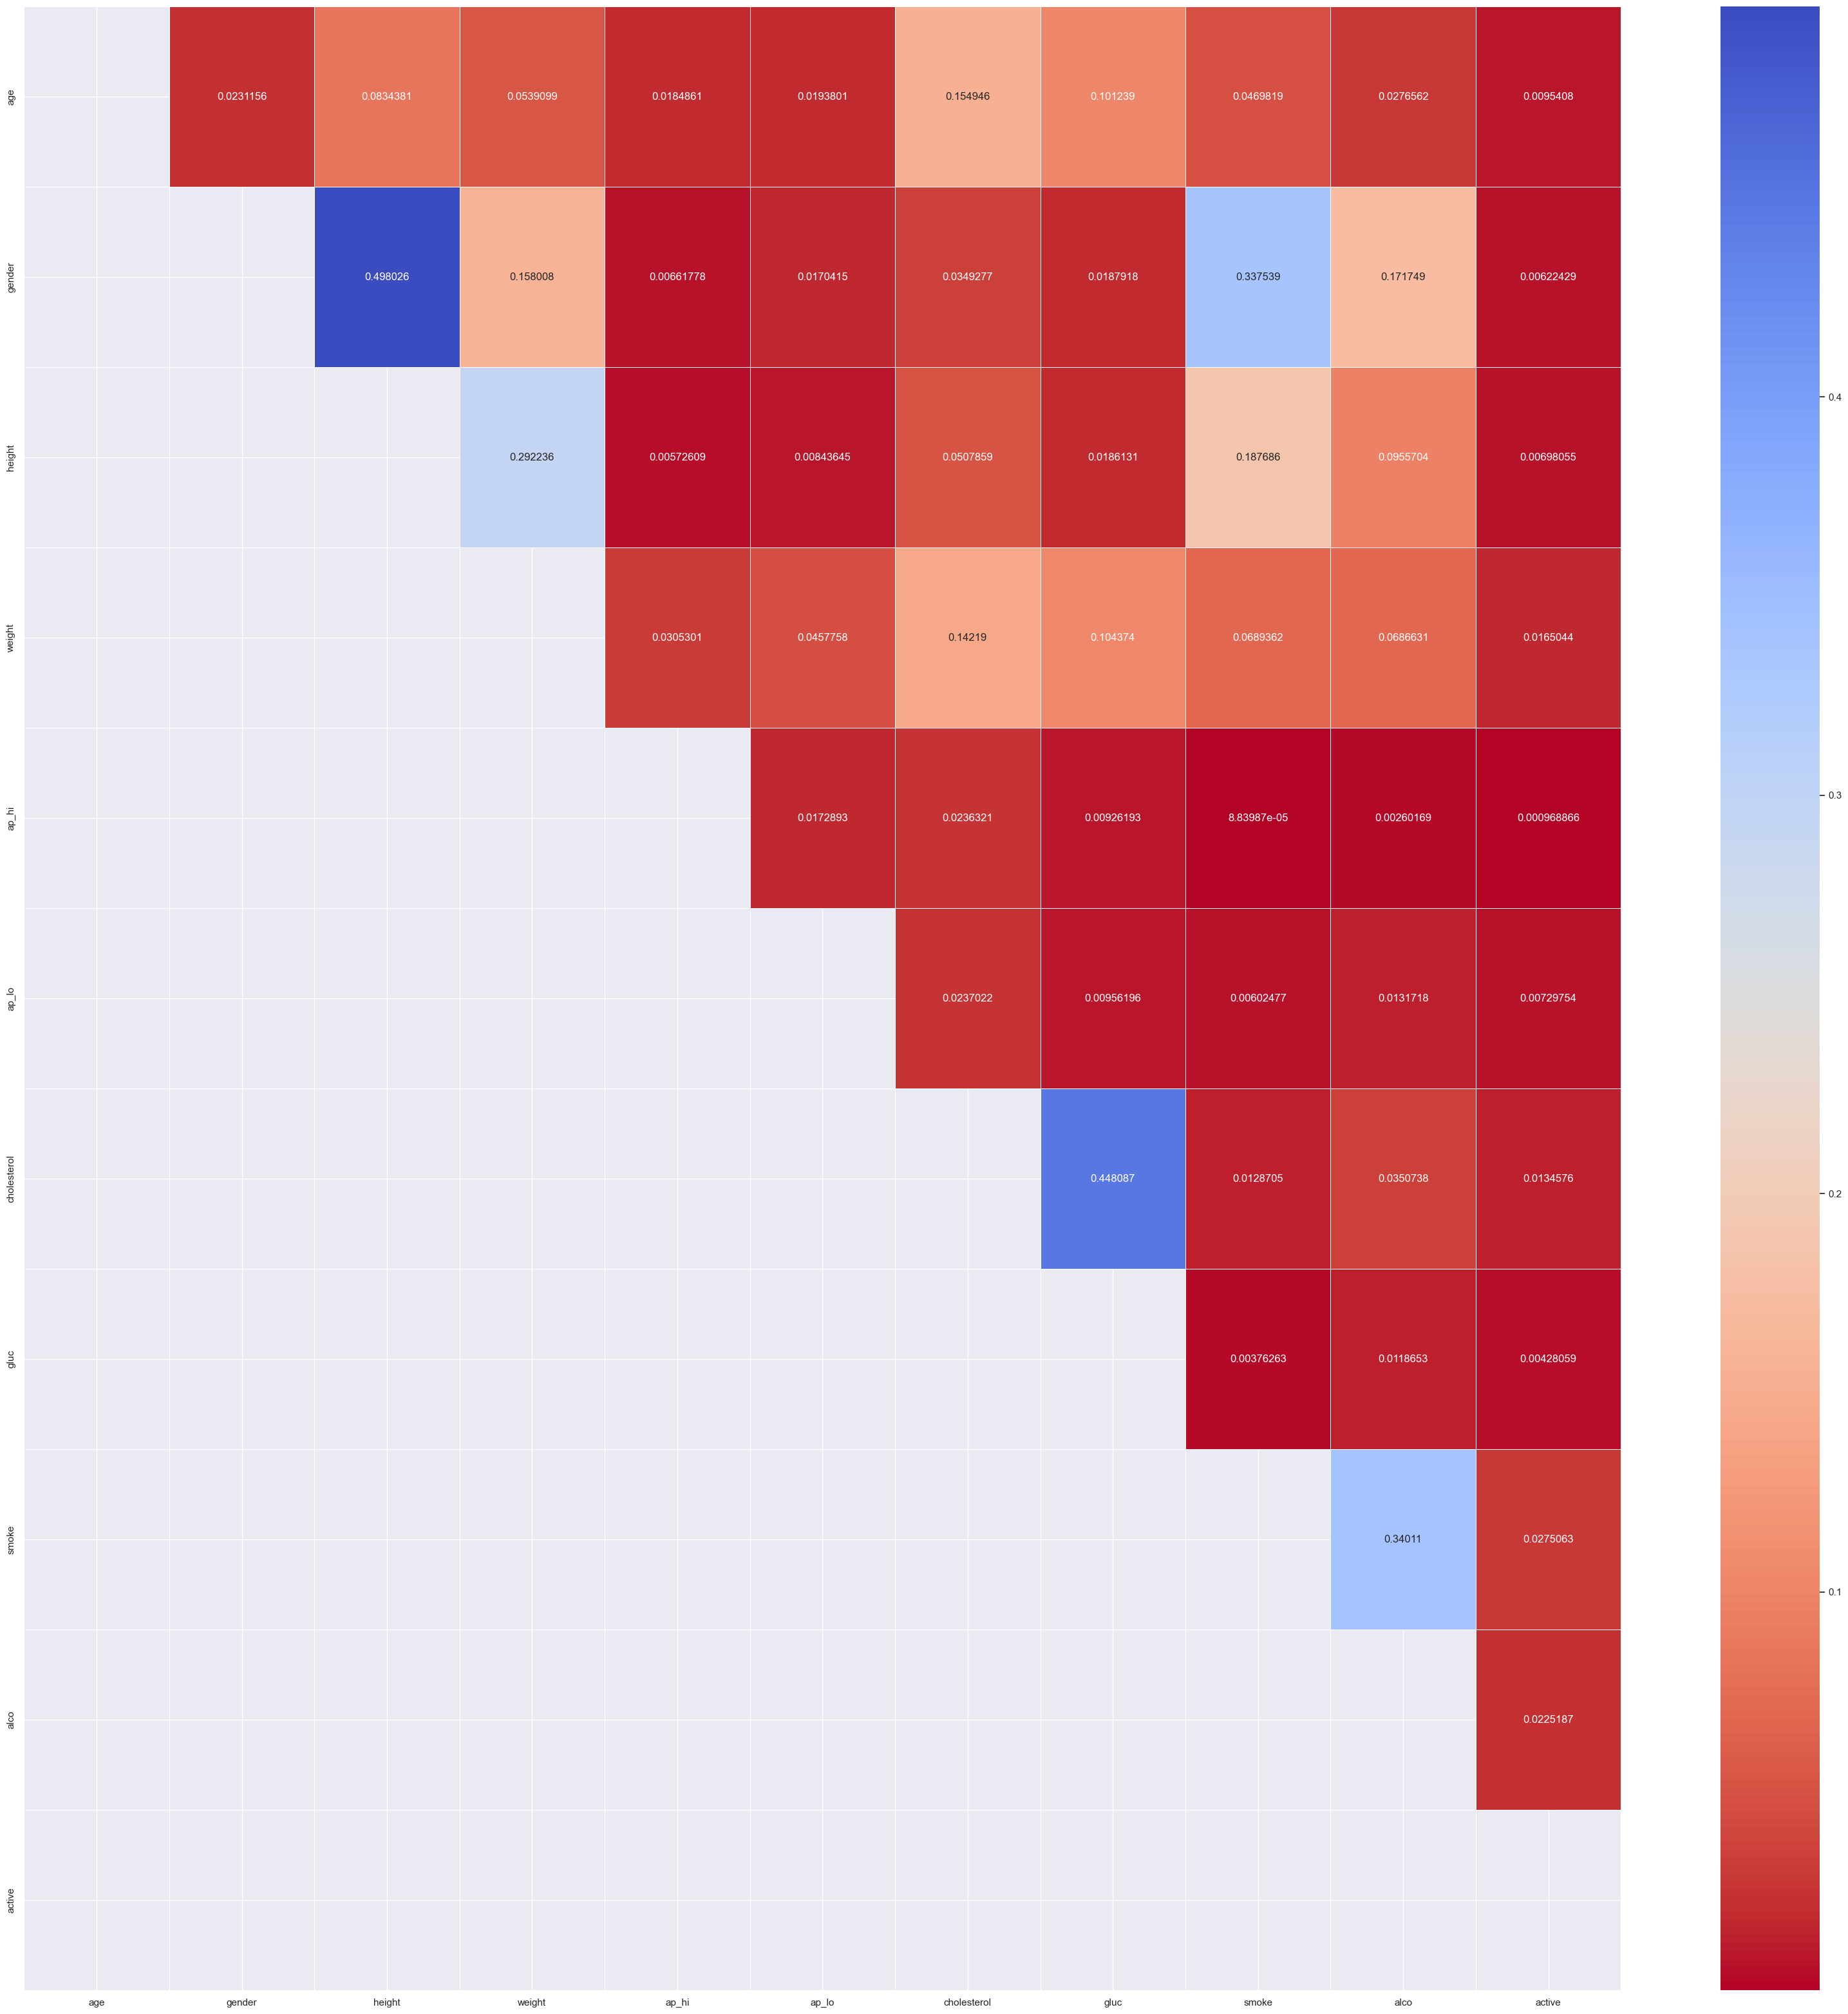

In [32]:
corr = x_train.corr().abs()

upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

sns.set()
plt.figure(figsize = (40, 40))
sns.heatmap(upper, annot = True, linewidths = 0.6, cmap = "coolwarm_r", fmt = 'g')
plt.show()

In [33]:
to_drop = list(column for column in upper.columns if any(upper[column] > 0.75))

list(to_drop)

[]

# Scaling data

In [34]:
sc = StandardScaler()
sc.fit(x_train)

StandardScaler()

In [36]:
sc_x_train = sc.transform(x_train)
sc_x_test = sc.transform(x_test)

In [37]:
sc_x_train = pd.DataFrame(data = sc_x_train, columns = x_train.columns)
sc_x_test = pd.DataFrame(data = sc_x_test, columns = x_test.columns)